In [41]:
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings('ignore') 

In [42]:
df = pd.read_csv('osteoporosis_final.csv')
df.describe()

,Age,back/joint/hip_pain,Osteoporosis
count,1958.000000,1958.000000,1958.000000
mean,39.101124,0.501788,0.500000
std,21.355424,0.357948,0.500128
min,18.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000
50%,32.000000,0.500000,0.500000
75%,53.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000


In [43]:
df.tail()

,Age,Gender,Hormonal Changes,Family History,Body Weight,back/joint/hip_pain,loss_in_muscle_strength,Smoking,Alcohol Consumption,Medical Conditions,Consumption_of_steroids,Height_loss/Stooped_poster,Prior Fractures,Osteoporosis
1953,19,Female,Normal,Yes,Normal,1.0,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,No,Yes,0
1954,23,Female,Postmenopausal,Yes,Underweight,0.0,Active,No,NaN,NaN,Corticosteroids,No,No,0
1955,34,Female,Postmenopausal,No,Underweight,0.5,Sedentary,No,NaN,Hyperthyroidism,NaN,No,No,0
1956,25,Male,Postmenopausal,No,Normal,0.0,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,Yes,0
1957,26,Female,Postmenopausal,No,Underweight,1.0,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,No,0


In [46]:
df.shape

(1958, 14)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1958 non-null   int64  
 1   Gender                      1958 non-null   object 
 2   Hormonal Changes            1958 non-null   object 
 3   Family History              1958 non-null   object 
 4   Body Weight                 1958 non-null   object 
 5   back/joint/hip_pain         1958 non-null   float64
 6   loss_in_muscle_strength     1958 non-null   object 
 7   Smoking                     1958 non-null   object 
 8   Alcohol Consumption         970 non-null    object 
 9   Medical Conditions          1311 non-null   object 
 10  Consumption_of_steroids     973 non-null    object 
 11  Height_loss/Stooped_poster  1958 non-null   object 
 12  Prior Fractures             1958 non-null   object 
 13  Osteoporosis                1958 

In [5]:
df.isnull().sum()

Age                             0
Gender                          0
Hormonal Changes                0
Family History                  0
Body Weight                     0
back/joint/hip_pain             0
loss_in_muscle_strength         0
Smoking                         0
Alcohol Consumption           988
Medical Conditions            647
Consumption_of_steroids       985
Height_loss/Stooped_poster      0
Prior Fractures                 0
Osteoporosis                    0
dtype: int64

In [6]:
df.fillna("NA", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1958 non-null   int64  
 1   Gender                      1958 non-null   object 
 2   Hormonal Changes            1958 non-null   object 
 3   Family History              1958 non-null   object 
 4   Body Weight                 1958 non-null   object 
 5   back/joint/hip_pain         1958 non-null   float64
 6   loss_in_muscle_strength     1958 non-null   object 
 7   Smoking                     1958 non-null   object 
 8   Alcohol Consumption         1958 non-null   object 
 9   Medical Conditions          1958 non-null   object 
 10  Consumption_of_steroids     1958 non-null   object 
 11  Height_loss/Stooped_poster  1958 non-null   object 
 12  Prior Fractures             1958 non-null   object 
 13  Osteoporosis                1958 

In [7]:
df = df.drop(['Height_loss/Stooped_poster'], axis=1)

In [8]:
for col in df.columns[1:-1]:
    print(df[col].unique())

['Female' 'Male']
['Normal' 'Postmenopausal']
['Yes' 'No']
['Underweight' 'Normal']
[0.5 1.  0. ]
['Sedentary' 'Active']
['Yes' 'No']
['Moderate' 'NA']
['Rheumatoid Arthritis' 'NA' 'Hyperthyroidism']
['Corticosteroids' 'NA']
['Yes' 'No']


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.columns[1:-1]:
    df[col] = encoder.fit_transform(df[col].values)
    #print(df[col].unique())
    
df.sample(n=10)

,Age,Gender,Hormonal Changes,Family History,Body Weight,back/joint/hip_pain,loss_in_muscle_strength,Smoking,Alcohol Consumption,Medical Conditions,Consumption_of_steroids,Prior Fractures,Osteoporosis
1375,18,0,1,0,0,0,0,1,0,0,1,0,0
625,55,0,0,0,0,2,0,0,0,1,0,1,1
739,41,0,1,0,0,2,1,0,1,2,0,1,1
553,67,1,1,1,0,0,0,0,1,1,0,0,1
619,40,0,1,1,0,2,0,0,1,0,1,1,1
984,34,0,0,0,1,1,1,1,0,2,0,1,0
1482,18,0,0,0,0,1,0,1,1,1,0,0,0
1525,19,0,0,1,0,1,1,0,0,0,1,0,0
160,19,1,1,1,1,1,1,0,0,0,1,0,1
1234,21,1,0,0,0,1,0,0,0,2,1,1,0


In [12]:
df['Osteoporosis'].value_counts()

Osteoporosis
1    979
0    979
Name: count, dtype: int64

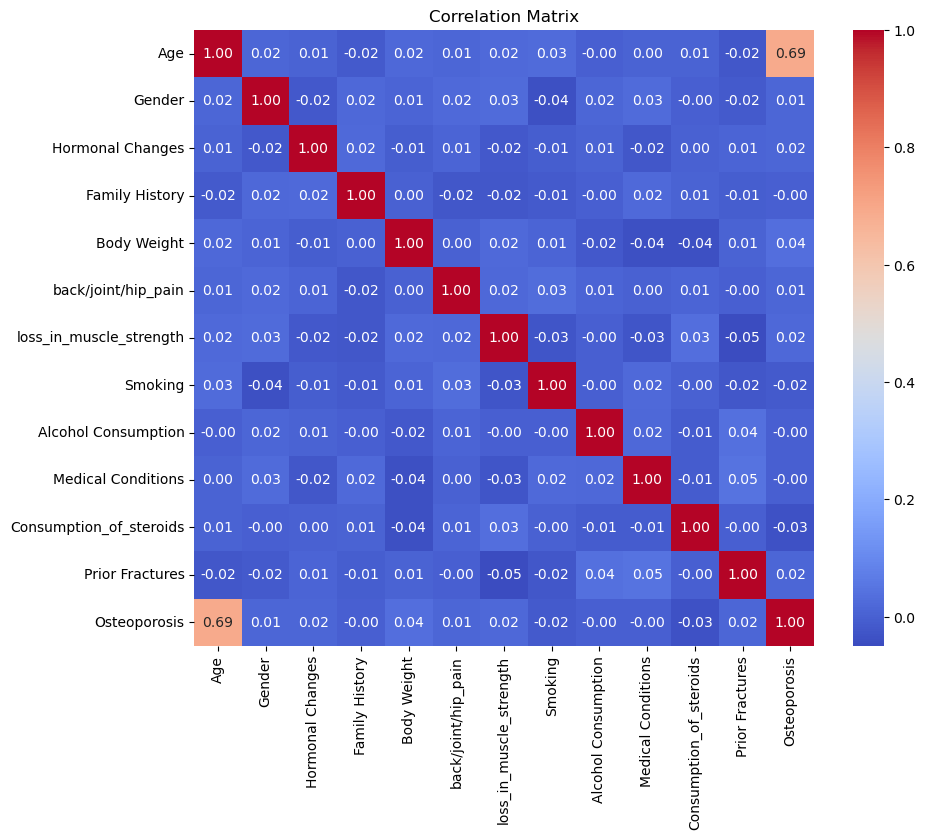

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Osteoporosis' is your target column
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Assuming df is your DataFrame and 'Osteoporosis' is your target column
X = df.drop(['Osteoporosis'], axis=1)  # Exclude 'Id' column
y = df['Osteoporosis']


In [23]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [24]:
y_train.value_counts()

Osteoporosis
0    786
1    780
Name: count, dtype: int64

In [25]:
y_test.value_counts()

Osteoporosis
1    199
0    193
Name: count, dtype: int64

In [26]:
print(X.shape,X_train.shape, X_test.shape)

(1958, 12) (1566, 12) (392, 12)


In [27]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


In [28]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score * 100:.2f}%")

Logistic Regression Accuracy: 81.63%
Decision Tree Accuracy: 81.89%
Support Vector Classifier Accuracy: 84.95%
K-Nearest Neighbors Accuracy: 85.46%


In [29]:
from sklearn.metrics import confusion_matrix
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model)
# Predict on the Test Data
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

KNeighborsClassifier()


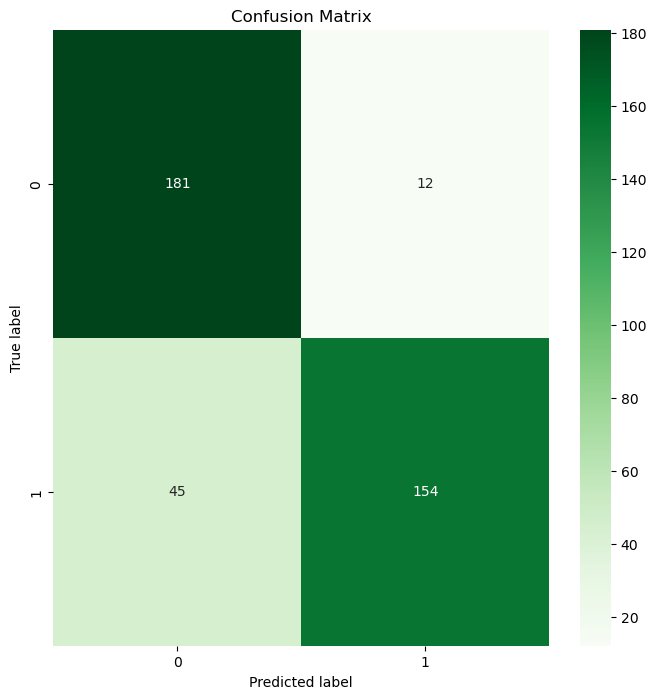

In [30]:
# Create a Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [31]:
X.columns

Index(['Age', 'Gender', 'Hormonal Changes', 'Family History', 'Body Weight',
       'back/joint/hip_pain', 'loss_in_muscle_strength', 'Smoking',
       'Alcohol Consumption', 'Medical Conditions', 'Consumption_of_steroids',
       'Prior Fractures'],
      dtype='object')

In [32]:
input_data = (32,0,0,1,1,1,1,0,1,1,1,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Osteoporosis')
else:
  print('The Person has Osteoporosis')

[1]
The Person has Osteoporosis


In [33]:
for column in X.columns:
    print(column)

Age
Gender
Hormonal Changes
Family History
Body Weight
back/joint/hip_pain
loss_in_muscle_strength
Smoking
Alcohol Consumption
Medical Conditions
Consumption_of_steroids
Prior Fractures


In [34]:
print(X.columns)

Index(['Age', 'Gender', 'Hormonal Changes', 'Family History', 'Body Weight',
       'back/joint/hip_pain', 'loss_in_muscle_strength', 'Smoking',
       'Alcohol Consumption', 'Medical Conditions', 'Consumption_of_steroids',
       'Prior Fractures'],
      dtype='object')


In [35]:
import joblib
import pickle

In [36]:
filename = "../Osteoporosis.sav"

In [37]:
pickle.dump(model, open(filename,'wb'))
#joblib.dump(model, filename)

In [38]:
loaded_model = pickle.load(open(filename,'rb'))
#loaded_model = joblib.load(filename)

In [39]:
input_data = (30,0,0,0,1,0,1,0,0,0,2,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Osteoporosis')
else:
  print('The Person has Osteoporosis')

[0]
The Person does not have a Osteoporosis
